<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [2]:
type(sac_csv)

str

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import statsmodels.api as sm


% matplotlib inline 
#shows plotting in notebook

In [4]:
# A: 
sc = pd.read_csv(sac_csv)

In [5]:
type(sc)

pandas.core.frame.DataFrame

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [6]:
# A:
sc.head(5)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
# A:
type(sc.head(10))

pandas.core.frame.DataFrame

In [8]:
# check null values
sc.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [9]:
# checking if the states match to CA
sc['state'].unique()

array(['CA', 'AC'], dtype=object)

In [10]:
# checking the types that are available 
sc['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [11]:
# checking datatypes, null values, columns and if all entries are there 
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [12]:
# checking statistics for columns 
# notice that there is negative values for price, sq_ft
#seen that there are houses that have no bedrooms, or baths
sc.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [13]:
# found row that have negative price, which also inclued negaitive Sq_ft and state is wrong 
sc[sc['price'] <0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [14]:
# seeing how many values are negative 
(sc['price'] <0).value_counts()

False    984
True       1
Name: price, dtype: int64

In [15]:
# Decided to correct state, and take the negaive off te sq-ft and price 
# keeping the row
sc.loc[703,'state'] = 'CA'

In [16]:
sc.loc[703,'sq__ft'] = 984

In [17]:
sc.loc[703,'price'] = 210944

In [18]:
# checking value to make sure changes was made
sc.loc[703]

street                   1900 DANBROOK DR
city                           SACRAMENTO
zip                                 95835
state                                  CA
beds                                    1
baths                                   1
sq__ft                                984
type                                Condo
sale_date    Fri May 16 00:00:00 EDT 2008
price                              210944
latitude                         -121.503
longitude                         38.6684
Name: 703, dtype: object

In [19]:
# checked to see how mand houses with no bedrooms
#looks like the houses with no bedrooms also have no baths and no sq_ft
#kept rows because they must be land available to build 
sc[sc['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


The data set is complete with correct datatypes with no null values. Use unique to see if all state in the state column are the same. There was one AC. I just corrected AC to CA which will complete the state dataset. When I looked at the data through the describe. I noticed that there was a min value of a negative price in price column and a negative square feet in the sq_ft column which I decided. I would just correct the format of the values. So, it would make sense. 

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [20]:
type(sc.corr())

pandas.core.frame.DataFrame

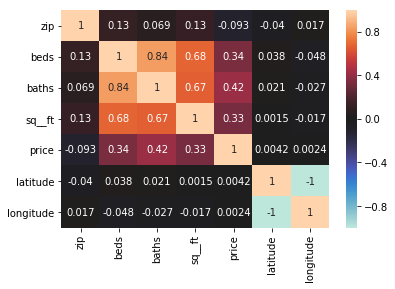

In [21]:
sns.heatmap(sc.corr(), annot=True, center =0)

In [22]:
# A: Using the heat map shows that the indpendent variable x Price
# is Strongly correlated with beds, baths, sq_ft.
#Seems like beds, baths, and sq_ft would be for predictors 

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [23]:
# A: Baths have the strongest correlation compared to beds and sq_ft with price with beds being at 0.42. 

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [24]:
# x = np.linspace(-5,50,100)
x = sc['baths']

In [25]:
# y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
y = sc['price']
sc['Mean_Yhat'] = y.mean()

In [26]:
intercept_slope = np.sum(np.square(sc['price'] - sc['Mean_Yhat']))

In [27]:
# A: I know I did this wrong
def si(table):
    intercept_slope = np.sum(np.square(sc['price'] - sc['Mean_Yhat']))
    return intercept_slope

In [28]:
print('Intercept is ', intercept_slope)

Intercept is  18838783738865.37


In [29]:
si('baths')

18838783738865.37

### 6. Interpret the intercept. Interpret the slope.

In [30]:
# A: X works with the y value. As the X value increases so should the y value
# The slope will increase by the price variable

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [31]:
# Prediction
# A: As a real estate agent, I may want to predict the pricing of housing
# in different areas along with the amount of space available and bedrooms
# Considering the cusotmer price range. I will best be able to determine
# where to start looking. 

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [32]:
y_bar = sc['price'].mean()
x_bar = sc['baths'].mean()
std_y = np.std(sc['price'], ddof=1)
std_x = np.std(sc['baths'], ddof=1)
r_xy = sc.corr().loc['baths','price']

beta_1_hat = r_xy * std_y / std_x
beta_0_hat = y_bar - beta_1_hat *x_bar


In [33]:
print(beta_1_hat,beta_0_hat)

64318.53523673409 119872.75465554858


In [34]:
sc['Linear_Yhat'] = beta_0_hat + beta_1_hat * sc['baths']

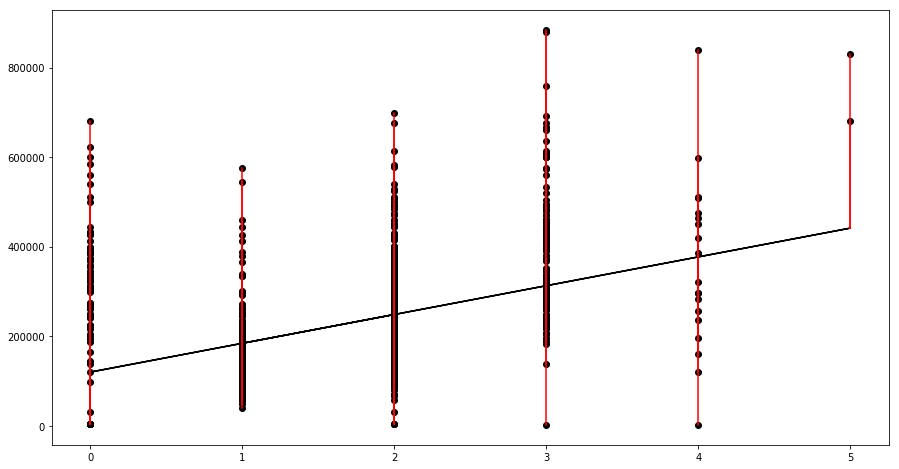

In [35]:
# A:

fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)


ax = fig.gca()


ax.scatter(x=sc['baths'], y=sc['price'], c='k')
ax.plot(sc['baths'], sc['Linear_Yhat'], color='k');

for _, row in sc.iterrows():
    plt.plot((row['baths'], row['baths']), (row['price'], row['Linear_Yhat']), 'r-')

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [36]:
# A:
sc_new = pd.get_dummies(sc[['type']])

sc_new.head()

,type_Condo,type_Multi-Family,type_Residential,type_Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [37]:
# A: 
sc_new.drop('type_Unkown', axis = 1, inplace=True)

In [38]:
sc_new.head()

,type_Condo,type_Multi-Family,type_Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [39]:
sc.head(1)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Mean_Yhat,Linear_Yhat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,184191.289892


In [40]:
sc = pd.concat([sc, sc_new], axis=1)
sc.head(1)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Mean_Yhat,Linear_Yhat,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,184191.289892,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [44]:
sc['Huge_homes'] = (sc['sq__ft'] > 3775).astype(int)

In [45]:
sc['Huge_homes'].value_counts()

0    975
1     10
Name: Huge_homes, dtype: int64

In [46]:
from sklearn.linear_model import LinearRegression

X = sc[['sq__ft', 'beds', 'baths','Huge_homes']].values
y = sc['price'].values

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

In [42]:
sc.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Mean_Yhat,Linear_Yhat,type_Condo,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,184191.289892,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959,184191.289892,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959,184191.289892,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959,184191.289892,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959,184191.289892,0,0,1


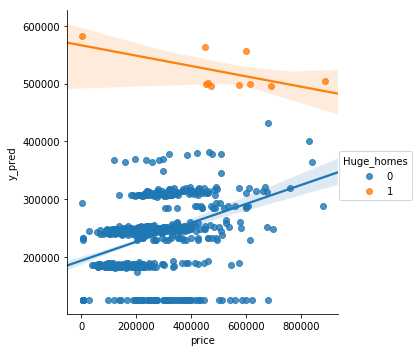

In [47]:
sc['y_pred'] = y_pred
sns.lmplot(x='price', y='y_pred', data=sc, hue='Huge_homes')

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# A: With the errors looking skewed right it does not show normality 

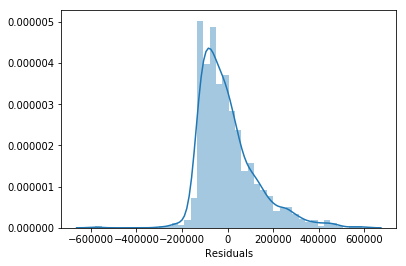

In [48]:
sc['Residuals'] = sc['price'] - sc['y_pred']
sns.distplot(sc['Residuals'])

In [71]:
#A Looks like it does show linearity because the y and x have an approximate
# linear relationship

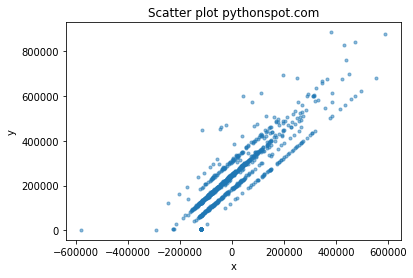

In [70]:
# Plot

x='Residuals'
y='price'

plt.scatter(x, y, s=area, data=sc, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

---

> The material following this point can be completed after the first lesson on Tuesday.

---

In [ ]:
# Standard Errors assume that the covariance matrix of the errors is correctly specified.
# The condition number is large, 1.7e+04. This might indicate that there are
# strong multicollinearity or other numerical problems.
# A "unit" increase in sq_ft is associated with a 9.4538 "unit" increase in prince.


In [72]:
# Importing the stats model API
import statsmodels.api as sm


# Setting my X and y for modeling
sc['intercept'] = 1
X = sc[['intercept','sq__ft','beds','baths','Huge_homes']]
y = sc['price']

model = sm.OLS(y,X).fit()

In [73]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     59.05
Date:                Wed, 04 Jul 2018   Prob (F-statistic):           1.07e-44
Time:                        13:37:52   Log-Likelihood:                -12951.
No. Observations:                 985   AIC:                         2.591e+04
Df Residuals:                     980   BIC:                         2.594e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.252e+05   9748.440     12.844      0.000    1.06e+05    1.44e+05
sq__ft         9.4538      6.985      1.353      0.176      -4.254      23.161
beds       -3947.2178   5955.987     -0.663      0.508   -1.56e+04    7740.738
baths       5.979e+04   8400.448      7.117      0.000    4.33e+04    7.63e+04
Huge_homes  1.747e+05   4.29e+04      4.075      0.000    9.06e+04    2.59e+05
==============================================================================
Omnibus:                      231.835   Durbin-Watson:                   0.432
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.528
Skew:                           1.257   Prob(JB):                    4.69e-120
Kurtosis:                       5.658   Cond. No.                     1.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [74]:
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [ ]:
# A:
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
y = sc['price']
x = sc['baths']

In [ ]:
y = sc['price']
X = sc.drop(['street', 'city', 'zip', 'state', 'type', 'sale_date', 'latitude', 'longitude','sq__ft'], axis="columns")


regression = sklearn.linear_model.LinearRegression(
    fit_intercept = True, 
    normalize = False,
    copy_X = True,
    n_jobs = 1
)

model = regression.fit(X, y)
y_hat = model.predict(X)

y_hat

In [91]:
def regression_metrics(y, y_hat, p):
    r2 = sklearn.metrics.r2_score(y, y_hat),
    mse = sklearn.metrics.mean_squared_error(y, y_hat),
    #r2_adj = r2_adj(y, y_hat,p),
    msle = sklearn.metrics.mean_squared_log_error(y, y_hat),
    mae = sklearn.metrics.mean_absolute_error(y,y_hat),
    rmse = np.sqrt(mse)
    
    print('r2 = ', r2)
    print('mse = ', mse)
    #print(r2_adj)
    print('msle = ', msle)
    print('mae = ', mae)
    print('rmse = ', rmse)   

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [92]:
# A:
regression_metrics(sc['price'], y_pred, X.shape[1])


r2 =  (0.19421379933530336,)
mse =  (15411199973.689539,)
msle =  (0.8478591994535334,)
mae =  (93077.08723188947,)
rmse =  [124141.85423816]


In [94]:
sc.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'Mean_Yhat',
       'Linear_Yhat', 'type_Condo', 'type_Multi-Family', 'type_Residential',
       'y_pred', 'Huge_homes', 'Residuals', 'intercept'],
      dtype='object')

In [99]:
features = ['beds', 'baths', 'sq__ft','type_Condo', 'type_Multi-Family', 'type_Residential']
X = sc[features].values
y = sc['price'].values

model = LinearRegression()
model.fit(X, y)

y_hat = model.predict(X)

In [100]:
regression_metrics(sc['price'], y_pred, X.shape[1])

r2 =  (0.19421379933530336,)
mse =  (15411199973.689539,)
msle =  (0.8478591994535334,)
mae =  (93077.08723188947,)
rmse =  [124141.85423816]


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# A it seems like it will be in the sweet spot. I don't see signs for high bias or high variance 

In [101]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(model, X, y)
print(cv_scores)
print(np.mean(cv_scores))


[ 0.09621108  0.10519894 -0.14432181]
0.01902940197070409
